## Machine Learning Methods Final Project
#### Madison Poore

Document Outline: <br><br>
Housing Dataset: <br>
I. Stage 1 - Linear Models <br>
II. Stage 2 - SHAP<br>
III. Stage 3 - Advanced ML Models<br><br>
Loan Dataset: <br>
IV. Stage 1 - Linear Models <br>
V. Stage 2 - SHAP<br>
VI. Stage 3 - Advanced ML Models<br><br><br>

************
#### Stage 1: Linear Models (Housing Dataset)

The housing dataset consists of 9 input features and one output variable (`median_house_value`).

I will use polynomial features to implement a linear regression model for this dataset. <br><br>

In [1]:
# prompting to navigate to datasets via UI
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [2]:
import pandas as pd
# transfering to a pandas dataframe
housing = pd.read_csv('housing.csv')

In [3]:
# starting with some preliminary data analysis

# checking index & column names:
print("index rows:", housing.index)
print("column names:", housing.columns)

# printing out first 5 rows of df
housing.head()

# scanning for problems, checking .info()
housing.info()

index rows: RangeIndex(start=0, stop=20640, step=1)
column names: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(

In [4]:
# visualizations of each variable
import matplotlib.pyplot as plt
import seaborn as sns
#sns.pairplot(housing,diag_kind='hist',corner=True)
#plt.show()

It looks like we might have some outliers in our dataset (especially in `median_house_value` and `housing_median_age`). However, we will take note of this and move on.

In [5]:
# this changes the ocean_proximity variable into a dummy variable so we can include
# it in our regression model
def filter_and_select_features(data):
    """
    Selects input columns from data and names as X
    Selects output column from data and names as y
    """
    input_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                     'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity']
    output_column = 'median_house_value'

    # so we don't overwrite original data
    X = data[input_columns].copy()
    y = data[output_column]

    #dummy variables for the categorical variable ocean_proximity
    X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

    #address introduced NaN values
    X.fillna(X.median(), inplace=True)

    return X, y

# Calling function with housing data
X, y = filter_and_select_features(housing)
X.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [6]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [7]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.head()
print(X_train.shape,X_test.shape)

(15480, 12) (5160, 12)


In [10]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#creating polynomial feature regression model
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#training the model
model = LinearRegression()
model.fit(X_train_poly,y_train)

#predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

#evaluation metrics
train_mse = mean_squared_error(y_train,y_train_pred)
test_mse = mean_squared_error(y_test,y_test_pred)
train_r2 = r2_score(y_train,y_train_pred)
test_r2 = r2_score(y_test,y_test_pred)

print("train mse:", train_mse)
print("test mse:", test_mse)
print("train r2:", train_r2)
print("test r2:", test_r2)

train mse: 3789833903.6282854
test mse: 4415304251.092156
train r2: 0.7159715457632316
test r2: 0.6663207497918819


The train MSE and test MSE are large but make sense in the context of housing prices.

$$
\Delta \text{MSE}=\frac{|4415304251.092156-3789833903.6282854|}{4415304251.092156} < 20\%
$$

So the change in MSE tells us our Polynomial Features regression model generalizes fairly well to unseen data!<br><br>

The training $R^2 \approx 0.72$ and the test $R^2 \approx 0.67$ which is pretty close, meaning we shouldn't be too worried about overfitting!


*********
### Stage 2: Feature Contribution Analysis with SHAP (Housing Dataset)


In [11]:
#importing to do SHAP analysis
import shap

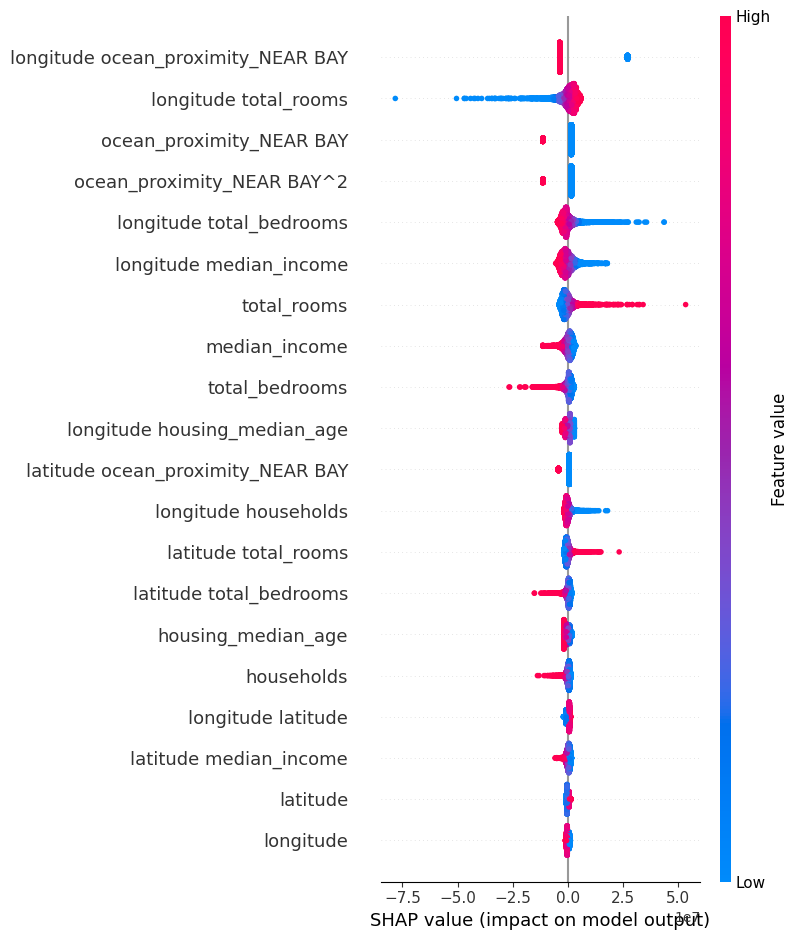

In [12]:
#computing SHAP values and plotting via summary_plot
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model.fit(X_train_poly, y_train)
explainer = shap.Explainer(model, X_train_poly, feature_names=poly.get_feature_names_out())
shap_values = explainer(X_test_poly)
shap.summary_plot(shap_values, X_test_poly, feature_names=poly.get_feature_names_out())

The SHAP values are helpful because they allow for more explainability of the model. <br>
These specific SHAP values tell us which features are most impactful to the model. <br>
This graphic tells us the features with the longest length have the most impact on the model.

**********************
### Stage 3: Advanced Machine Learning Models (Housing Dataset)

Within this stage for the Housing Dataset, I will use Decision Trees and Neural Networks! <br> <br>
Starting with Decision Trees:

In [14]:
#notice we are importing Decision Tree Regressor to implement an appropriate
#regression algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

#instantiating model
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

#performance metrics
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree MSE:", dt_mse)
print("Decision Tree R2:", dt_r2)

Decision Tree MSE: 3711015403.2379346
Decision Tree R2: 0.7195462041020364


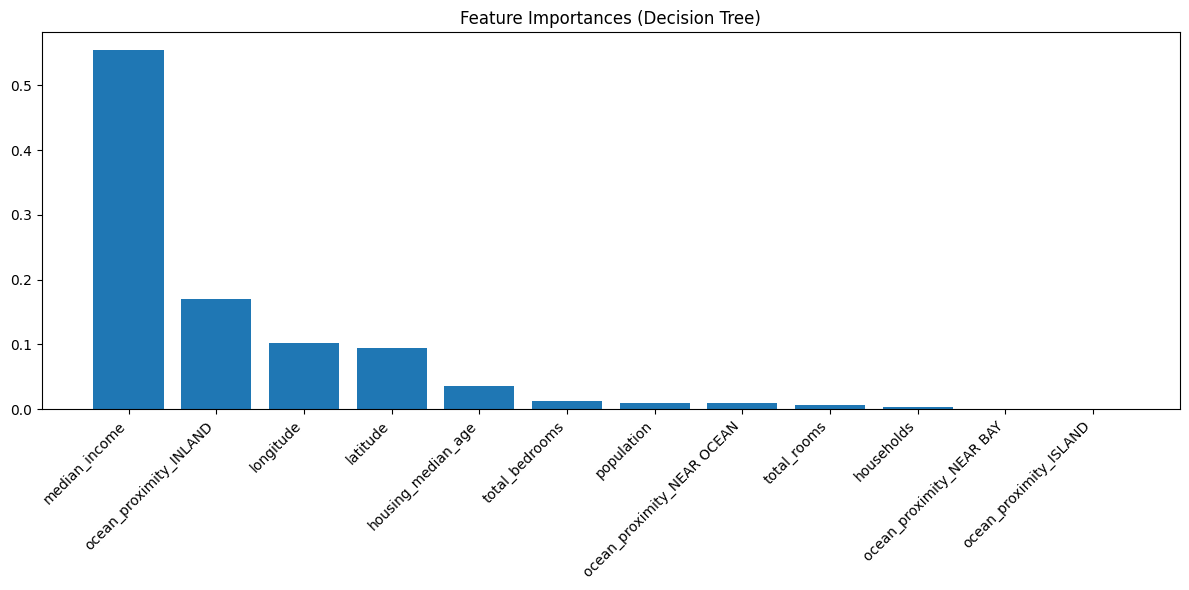

In [16]:
import numpy as np
#generating figure to understand model structure
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

#standard matplotlib calls
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Decision Tree)")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, ha="right")
plt.tight_layout()
plt.show()

Now moving on to Neural Networks:

In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#instantiating model
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu',
                   max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluate
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
mlp_r2 = r2_score(y_test, y_pred_mlp)

print("Neural Network MSE:", mlp_mse)
print("Neural Network R2:", mlp_r2)

# X_sample = X_test_scaled[:100]

# explainer = shap.KernelExplainer(mlp.predict, X_sample)
# shap_values = explainer.shap_values(X_sample)

# shap.summary_plot(shap_values, X_sample, feature_names=X.columns)


Neural Network MSE: 4144035123.015553
Neural Network R2: 0.6868214614334005


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


The model that has the lowest MSE and the highest $R^2$ is the Decision Tree model. <br><br>

Hence, we will choose the Decision tree model to be our final model for the Regression dataset.

*********************
*********************
#### Stage 1: Linear Models (Loan Dataset)


The loan dataset focuses on predicting the loan approval status (1=approved, 0=rejected).

Once again, we start by going through preliminary data analysis. Here is a summary of the variables within this dataset: <br>

`person_age`: age of person (float) <br>
`person_gender`: gender (categorical) <br>
`person_education`: highest level of education (categorical) <br>
`person_income`: annual income (float)
`person_emp_exp`: years of employment experience (int) <br>
`person_home_ownership`: home ownership status (categorical) <br>
`loan_amnt`: loan amount requested (float) <br>
`loan_intent`: purpose of the loan (float) <br>
`loan_int_rate`: interest rate (float) <br>
`loan_percent_income`: loan amount as a percentage of annual income (float) <br>
`cb_person_cred_hist_length`: length of credit history in years (float) <br>
`credit_score`: credit score (integer) <br>
`previous_loan_defaults_on_file`: indicator of previous loan defaults (categorical) <br>
`loan_status`: target!!!!! (int) <br><br>

Note that instead of X and y as the variables and output, I will use A and b. This is so I do not overwright the data/analysis from the housing dataset when doing the loan analysis.

In [18]:
#reading in the second dataset
from google.colab import files
uploaded2 = files.upload()

Saving loan.csv to loan.csv


In [19]:
import pandas as pd
loan = pd.read_csv('loan.csv')

In [20]:
#running through same analysis as housing dataset
# checking index & column names:
print("index rows:", loan.index)
print("column names:", loan.columns)

# printing out first 5 rows of df
loan.head()

# scanning for problems, checking .info()
loan.info()

index rows: RangeIndex(start=0, stop=45000, step=1)
column names: Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_am

In [17]:
#sns.pairplot(loan,diag_kind='hist',corner=True)
#plt.show()

In [21]:
from sklearn.datasets import load_iris as load_data, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [22]:
# we can reuse some of the functions from the housing dataset to quicken our code here
def filter_and_select_features2(data):
    """
    Selects input columns from data and names as A
    Selects output column from data and names as b
    """
    input_columns = ['person_age','person_gender','person_education','person_income','person_emp_exp',
                     'person_home_ownership','loan_amnt','loan_intent','loan_int_rate','loan_percent_income',
                     'cb_person_cred_hist_length','credit_score','previous_loan_defaults_on_file']
    output_column = 'loan_status'

    # so we don't overwrite original data
    X = data[input_columns].copy()
    y = data[output_column]

    X = pd.get_dummies(X,drop_first=True)
    X.fillna(X.median(),inplace=True)

    return X, y

A,b=filter_and_select_features2(loan)

In [23]:
#now splitting into train and test data
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.25, random_state=42)
A_train.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
24224,31.0,18143.0,6,4200.0,14.17,0.23,8.0,590,True,True,...,False,False,False,True,False,False,False,False,False,False
38081,25.0,42804.0,5,15000.0,14.10,0.35,3.0,580,True,False,...,False,False,False,False,False,False,True,False,False,True
2955,26.0,42730.0,3,3800.0,6.54,0.09,3.0,555,True,False,...,False,False,False,False,False,True,False,False,False,True
30973,43.0,87295.0,17,5050.0,6.99,0.06,16.0,706,True,False,...,False,False,False,False,False,False,False,False,False,True
41258,34.0,48947.0,11,6000.0,11.87,0.12,10.0,712,False,False,...,True,False,False,True,False,False,False,False,False,False


train acc: 0.8457777777777777
test acc: 0.8376888888888889
classification report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      8730
           1       0.70      0.47      0.57      2520

    accuracy                           0.84     11250
   macro avg       0.78      0.71      0.73     11250
weighted avg       0.83      0.84      0.83     11250



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


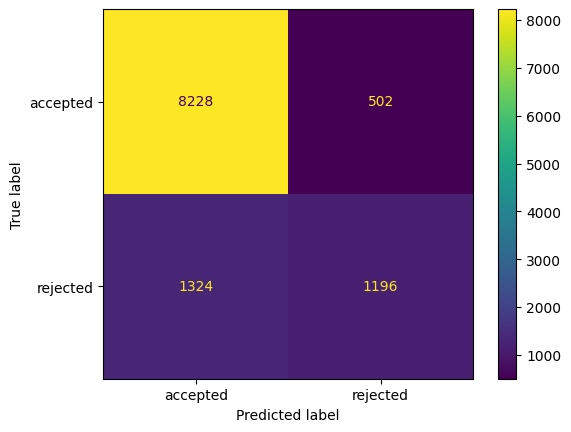

In [26]:
#instantiating logistic regression
model2 = LogisticRegression()
model2.fit(A_train,b_train)

b_train_pred = model2.predict(A_train)
b_test_pred = model2.predict(A_test)

#performance metrics
train_acc = accuracy_score(b_train,b_train_pred)
test_acc = accuracy_score(b_test,b_test_pred)

print("train acc:", train_acc)
print("test acc:", test_acc)

print("classification report:")
print(classification_report(b_test,b_test_pred))

target_names=['accepted','rejected']
ConfusionMatrixDisplay.from_predictions(b_test,b_test_pred,display_labels=target_names)
plt.show()

*******************
### Stage 2: Feature Contribution Analysis with SHAP (Loan Dataset)



In [30]:
#changing dtype
A_train = A_train.apply(pd.to_numeric)
A_test = A_test.apply(pd.to_numeric)
#computing SHAP values
explainer = shap.Explainer(model2, A_train)
shap_values = explainer(A_test)

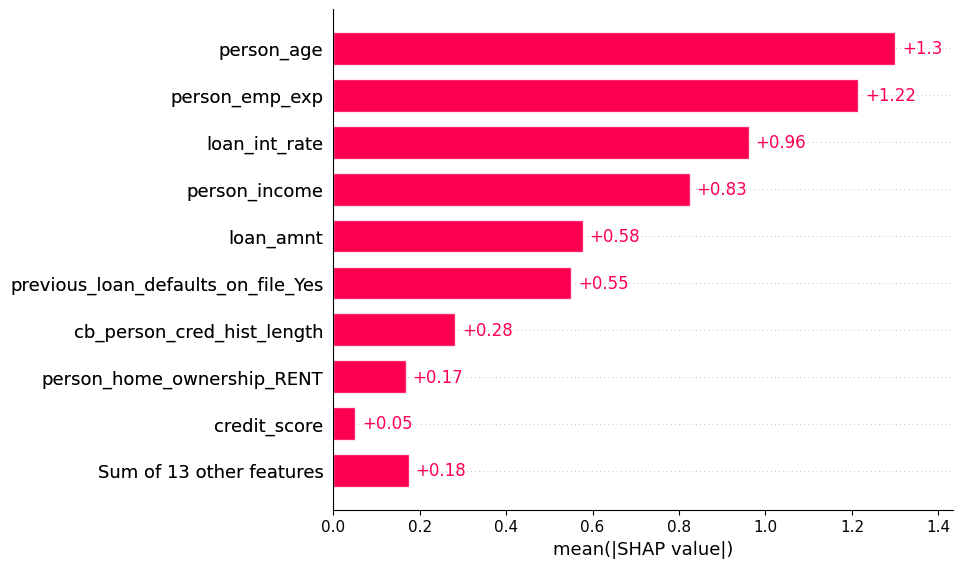

In [29]:
#plotting
shap.plots.bar(shap_values)

****************
### Stage 3: Advanced Machine Learning Models (Loan Dataset)

In [31]:
from sklearn.tree import DecisionTreeClassifier

#instantiating model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(A_train, b_train)

#predictions
b_test_pred_dt = dt_model.predict(A_test)

#evaluation
print("Decision Tree Classification Report:")
print(classification_report(b_test, b_test_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8730
           1       0.85      0.72      0.78      2520

    accuracy                           0.91     11250
   macro avg       0.89      0.84      0.86     11250
weighted avg       0.91      0.91      0.91     11250



In [33]:
from sklearn.neural_network import MLPClassifier

#neural net w two hidden layers
#instantiating with MLP classifier
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
nn_model.fit(A_train, b_train)

#predictions
b_test_pred_nn = nn_model.predict(A_test)

#evaluation
print("classification report:")
print(classification_report(b_test, b_test_pred_nn))


classification report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      8730
           1       0.70      0.42      0.53      2520

    accuracy                           0.83     11250
   macro avg       0.78      0.68      0.71     11250
weighted avg       0.82      0.83      0.81     11250



The model that has the best performance based on the classification report is: Decision Trees. <br><br>
Once again, the Decision Tree Model will be our final model. This is because the precision, recall and f1-score is the highest for both classes.